<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">PEC3 · Visualización de Datos</p>
<p style="margin: 0; text-align:right;">2023-1 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Manuel Ernesto Martínez Martín
</div>

# Descenso demográfico en España

## Fuente

**INE**: [Movimiento Natural de la Población](https://www.ine.es/dynt3/inebase/index.htm?padre=1684&capsel=1684)

+ **CSV de Nacimientos**: [Fechas del 1941 al 2022](https://www.ine.es/jaxiT3/Tabla.htm?t=6518&L=0)
+ **CSV 1 de Defunciones**: [Fechas del 1930 al 1974](https://www.ine.es/jaxiT3/Tabla.htm?t=6553&L=0)
+ **CSV 2 de Defunciones**: [Fechas del 1975 al 2022](https://www.ine.es/jaxiT3/Tabla.htm?t=6545&L=0)

**Licencia**: Creative Commons Reconocimiento 4.0 (CC BY 4.0)

## Carga de librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import matplotlib.animation as animation
import imageio
import os
from moviepy.editor import VideoFileClip

## Diccionario para enriquecer el dataset

In [2]:
provincias = {
    '01 Araba/Álava': {'cod_prov': '01', 'name_prov': 'Araba/Álava','cod_ccaa': '16', 'name_ccaa': 'País Vasco'},
    '02 Albacete': {'cod_prov': '02', 'name_prov': 'Albacete', 'cod_ccaa': '08', 'name_ccaa': 'Castilla-La Mancha'},
    '03 Alicante/Alacant': {'cod_prov': '03', 'name_prov': 'Alicante/Alacant', 'cod_ccaa': '10', 'name_ccaa': 'Comunidad Valenciana'},
    '04 Almería': {'cod_prov': '04', 'name_prov': 'Almería', 'cod_ccaa': '01', 'name_ccaa': 'Andalucía'},
    '05 Ávila': {'cod_prov': '05', 'name_prov': 'Ávila', 'cod_ccaa': '07', 'name_ccaa': 'Castilla y León'},
    '06 Badajoz': {'cod_prov': '06', 'name_prov': 'Badajoz', 'cod_ccaa': '11', 'name_ccaa': 'Extremadura'},
    '07 Balears, Illes': {'cod_prov': '07', 'name_prov': 'Balears, Illes', 'cod_ccaa': '04', 'name_ccaa': 'Illes Balears'},
    '08 Barcelona': {'cod_prov': '08', 'name_prov': 'Barcelona', 'cod_ccaa': '09', 'name_ccaa': 'Cataluña'},
    '09 Burgos': {'cod_prov': '09', 'name_prov': 'Burgos', 'cod_ccaa': '07', 'name_ccaa': 'Castilla y León'},
    '10 Cáceres': {'cod_prov': '10', 'name_prov': 'Cáceres', 'cod_ccaa': '11', 'name_ccaa': 'Extremadura'},
    '11 Cádiz': {'cod_prov': '11', 'name_prov': 'Cádiz', 'cod_ccaa': '01', 'name_ccaa': 'Andalucía'},
    '12 Castellón/Castelló': {'cod_prov': '12', 'name_prov': 'Castellón/Castelló', 'cod_ccaa': '10', 'name_ccaa': 'Comunidad Valenciana'},
    '13 Ciudad Real': {'cod_prov': '13', 'name_prov': 'Ciudad Real', 'cod_ccaa': '08', 'name_ccaa': 'Castilla-La Mancha'},
    '14 Córdoba': {'cod_prov': '14', 'name_prov': 'Córdoba', 'cod_ccaa': '01', 'name_ccaa': 'Andalucía'},
    '15 Coruña, A': {'cod_prov': '15', 'name_prov': 'A Coruña', 'cod_ccaa': '12', 'name_ccaa': 'Galicia'},
    '16 Cuenca': {'cod_prov': '16', 'name_prov': 'Cuenca', 'cod_ccaa': '08', 'name_ccaa': 'Castilla-La Mancha'},
    '17 Girona': {'cod_prov': '17', 'name_prov': 'Girona', 'cod_ccaa': '09', 'name_ccaa': 'Cataluña'},
    '18 Granada': {'cod_prov': '18', 'name_prov': 'Granada', 'cod_ccaa': '01', 'name_ccaa': 'Andalucía'},
    '19 Guadalajara': {'cod_prov': '19', 'name_prov': 'Guadalajara', 'cod_ccaa': '08', 'name_ccaa': 'Castilla-La Mancha'},
    '20 Gipuzkoa': {'cod_prov': '20', 'name_prov': 'Gipuzkoa/Guipúzcoa', 'cod_ccaa': '16', 'name_ccaa': 'País Vasco'},
    '21 Huelva': {'cod_prov': '21', 'name_prov': 'Huelva', 'cod_ccaa': '01', 'name_ccaa': 'Andalucía'},
    '22 Huesca': {'cod_prov': '22', 'name_prov': 'Huesca', 'cod_ccaa': '02', 'name_ccaa': 'Aragón'},
    '23 Jaén': {'cod_prov': '23', 'name_prov': 'Jaén', 'cod_ccaa': '01', 'name_ccaa': 'Andalucía'},
    '24 León': {'cod_prov': '24', 'name_prov': 'León', 'cod_ccaa': '07', 'name_ccaa': 'Castilla y León'},
    '25 Lleida': {'cod_prov': '25', 'name_prov': 'Lleida', 'cod_ccaa': '09', 'name_ccaa': 'Cataluña'},
    '26 Rioja, La': {'cod_prov': '26', 'name_prov': 'La Rioja', 'cod_ccaa': '17', 'name_ccaa': 'La Rioja'},
    '27 Lugo': {'cod_prov': '27', 'name_prov': 'Lugo', 'cod_ccaa': '12', 'name_ccaa': 'Galicia'},
    '28 Madrid': {'cod_prov': '28', 'name_prov': 'Madrid', 'cod_ccaa': '13', 'name_ccaa': 'Comunidad de Madrid'},
    '29 Málaga': {'cod_prov': '29', 'name_prov': 'Málaga', 'cod_ccaa': '01', 'name_ccaa': 'Andalucía'},
    '30 Murcia': {'cod_prov': '30', 'name_prov': 'Murcia', 'cod_ccaa': '14', 'name_ccaa': 'Región de Murcia'},
    '31 Navarra': {'cod_prov': '31', 'name_prov': 'Navarra', 'cod_ccaa': '15', 'name_ccaa': 'Navarra'},
    '32 Ourense': {'cod_prov': '32', 'name_prov': 'Ourense', 'cod_ccaa': '12', 'name_ccaa': 'Galicia'},
    '33 Asturias': {'cod_prov': '33', 'name_prov': 'Asturias', 'cod_ccaa': '03', 'name_ccaa': 'Asturias'},
    '34 Palencia': {'cod_prov': '34', 'name_prov': 'Palencia', 'cod_ccaa': '07', 'name_ccaa': 'Castilla y León'},
    '35 Palmas, Las': {'cod_prov': '35', 'name_prov': 'Las Palmas', 'cod_ccaa': '05', 'name_ccaa': 'Canarias'},
    '36 Pontevedra': {'cod_prov': '36', 'name_prov': 'Pontevedra', 'cod_ccaa': '12', 'name_ccaa': 'Galicia'},
    '37 Salamanca': {'cod_prov': '37', 'name_prov': 'Salamanca', 'cod_ccaa': '07', 'name_ccaa': 'Castilla y León'},
    '38 Santa Cruz de Tenerife': {'cod_prov': '38', 'name_prov': 'Santa Cruz de Tenerife', 'cod_ccaa': '05', 'name_ccaa': 'Canarias'},
    '39 Cantabria': {'cod_prov': '39', 'name_prov': 'Cantabria', 'cod_ccaa': '06', 'name_ccaa': 'Cantabria'},
    '40 Segovia': {'cod_prov': '40', 'name_prov': 'Segovia', 'cod_ccaa': '07', 'name_ccaa': 'Castilla y León'},
    '41 Sevilla': {'cod_prov': '41', 'name_prov': 'Sevilla', 'cod_ccaa': '01', 'name_ccaa': 'Andalucía'},
    '42 Soria': {'cod_prov': '42', 'name_prov': 'Soria', 'cod_ccaa': '07', 'name_ccaa': 'Castilla y León'},
    '43 Tarragona': {'cod_prov': '43', 'name_prov': 'Tarragona', 'cod_ccaa': '09', 'name_ccaa': 'Cataluña'},
    '44 Teruel': {'cod_prov': '44', 'name_prov': 'Teruel', 'cod_ccaa': '02', 'name_ccaa': 'Aragón'},
    '45 Toledo': {'cod_prov': '45', 'name_prov': 'Toledo', 'cod_ccaa': '08', 'name_ccaa': 'Castilla-La Mancha'},
    '46 Valencia/València': {'cod_prov': '46', 'name_prov': 'Valencia/València', 'cod_ccaa': '10', 'name_ccaa': 'Comunidad Valenciana'},
    '47 Valladolid': {'cod_prov': '47', 'name_prov': 'Valladolid', 'cod_ccaa': '07', 'name_ccaa': 'Castilla y León'},
    '48 Bizkaia': {'cod_prov': '48', 'name_prov': 'Bizkaia', 'cod_ccaa': '16', 'name_ccaa': 'País Vasco'},
    '49 Zamora': {'cod_prov': '49', 'name_prov': 'Zamora', 'cod_ccaa': '07', 'name_ccaa': 'Castilla y León'},
    '50 Zaragoza': {'cod_prov': '50', 'name_prov': 'Zaragoza', 'cod_ccaa': '02', 'name_ccaa': 'Aragón'},
    '51 Ceuta': {'cod_prov': '51', 'name_prov': 'Ceuta', 'cod_ccaa': '18', 'name_ccaa': 'Ceuta'},
    '52 Melilla': {'cod_prov': '52', 'name_prov': 'Melilla', 'cod_ccaa': '19', 'name_ccaa': 'Melilla'},
    'Total': {'cod_prov': '0', 'name_prov': 'España', 'cod_ccaa': '0', 'name_ccaa': 'España'}
}

## Carga de Dataset

In [3]:
nacimientos_provincias_1941_2022_df = pd.read_csv('data/nacimientos_provincias_1941_2022.csv', sep=";")
defunciones_provincias_1930_1974_df = pd.read_csv('data/defunciones_provincias_1930_1974.csv', sep=";")
defunciones_provincias_1975_2022_df = pd.read_csv('data/defunciones_provincias_1975_2022.csv', sep=";")

In [4]:
nacimientos_provincias_1941_2022_df.info()
print("-------------------")
defunciones_provincias_1930_1974_df.info()
print("-------------------")
defunciones_provincias_1975_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13038 entries, 0 to 13037
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total Nacional  13038 non-null  object 
 1   Provincias      12792 non-null  object 
 2   Sexo            13038 non-null  object 
 3   Periodo         13038 non-null  int64  
 4   Total           12993 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 509.4+ KB
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Total Nacional  7155 non-null   object 
 1   Provincias      7020 non-null   object 
 2   Sexo            7155 non-null   object 
 3   Periodo         7155 non-null   int64  
 4   Total           3943 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 279.6+ KB
--------

## Modificación y agregación de campos nuevos

In [5]:
nacimientos_provincias_1941_2022_df['Provincias'].fillna('Total', inplace=True)
defunciones_provincias_1930_1974_df['Provincias'].fillna('Total', inplace=True)

In [6]:
nacimientos_provincias_1941_2022_df = nacimientos_provincias_1941_2022_df[['Provincias','Sexo','Periodo','Total']]
defunciones_provincias_1930_1974_df = defunciones_provincias_1930_1974_df[['Provincias','Sexo','Periodo','Total']]

In [7]:
defunciones_provincias_1930_2022_df = pd.concat([defunciones_provincias_1975_2022_df, defunciones_provincias_1930_1974_df], ignore_index=True)
defunciones_provincias_1930_2022_df = defunciones_provincias_1930_2022_df[defunciones_provincias_1930_2022_df['Provincias'] != 'No residente']

In [8]:
nacimientos_provincias_1941_2022_df['provincia'] = nacimientos_provincias_1941_2022_df['Provincias'].apply(lambda x: provincias[x]['name_prov'])
nacimientos_provincias_1941_2022_df['codigo provincia'] = nacimientos_provincias_1941_2022_df['Provincias'].apply(lambda x: provincias[x]['cod_prov'])
defunciones_provincias_1930_2022_df['provincia'] = defunciones_provincias_1930_2022_df['Provincias'].apply(lambda x: provincias[x]['name_prov'])
defunciones_provincias_1930_2022_df['codigo provincia'] = defunciones_provincias_1930_2022_df['Provincias'].apply(lambda x: provincias[x]['cod_prov'])

nacimientos_provincias_1941_2022_df['comunidad'] = nacimientos_provincias_1941_2022_df['Provincias'].apply(lambda x: provincias[x]['name_ccaa'])
nacimientos_provincias_1941_2022_df['codigo comunidad'] = nacimientos_provincias_1941_2022_df['Provincias'].apply(lambda x: provincias[x]['cod_ccaa'])
defunciones_provincias_1930_2022_df['comunidad'] = defunciones_provincias_1930_2022_df['Provincias'].apply(lambda x: provincias[x]['name_ccaa'])
defunciones_provincias_1930_2022_df['codigo comunidad'] = defunciones_provincias_1930_2022_df['Provincias'].apply(lambda x: provincias[x]['cod_ccaa'])

In [9]:
nacimientos_provincias_1941_2022_df.rename(columns={'Periodo': 'año'}, inplace=True)
nacimientos_provincias_1941_2022_df.rename(columns={'Total': 'nacimientos'}, inplace=True)

defunciones_provincias_1930_2022_df.rename(columns={'Periodo': 'año'}, inplace=True)
defunciones_provincias_1930_2022_df.rename(columns={'Total': 'defunciones'}, inplace=True)

## Dataset definitivo

In [10]:
nacimientos_df = nacimientos_provincias_1941_2022_df[nacimientos_provincias_1941_2022_df['Sexo'] == 'Total']
defunciones_df = defunciones_provincias_1930_2022_df[defunciones_provincias_1930_2022_df['Sexo'] == 'Total']

In [11]:
nacimientos_df = nacimientos_df[['codigo comunidad', 'comunidad', 'codigo provincia', 'provincia', 'año', 'nacimientos']]
defunciones_df = defunciones_df[['codigo comunidad', 'comunidad', 'codigo provincia', 'provincia', 'año', 'defunciones']]
defunciones_df = defunciones_df[defunciones_df['año'] >= 1941]

In [12]:
natalidad_df = pd.merge(nacimientos_df, defunciones_df, on=['año', 'codigo provincia', 'codigo comunidad', 'comunidad', 'provincia'])
natalidad_df['ratio_natalidad_mortalidad'] = natalidad_df['nacimientos'] / natalidad_df['defunciones']

In [13]:
natalidad_df = natalidad_df.dropna(subset=['nacimientos', 'defunciones'])

## Creación de subset de solo España

In [14]:
natalidad_españa_df = natalidad_df[natalidad_df['comunidad'] == 'España']

In [15]:
natalidad_españa_df.to_csv('out/natalidad_españa.csv', index=False)

## Gráficos de líneas

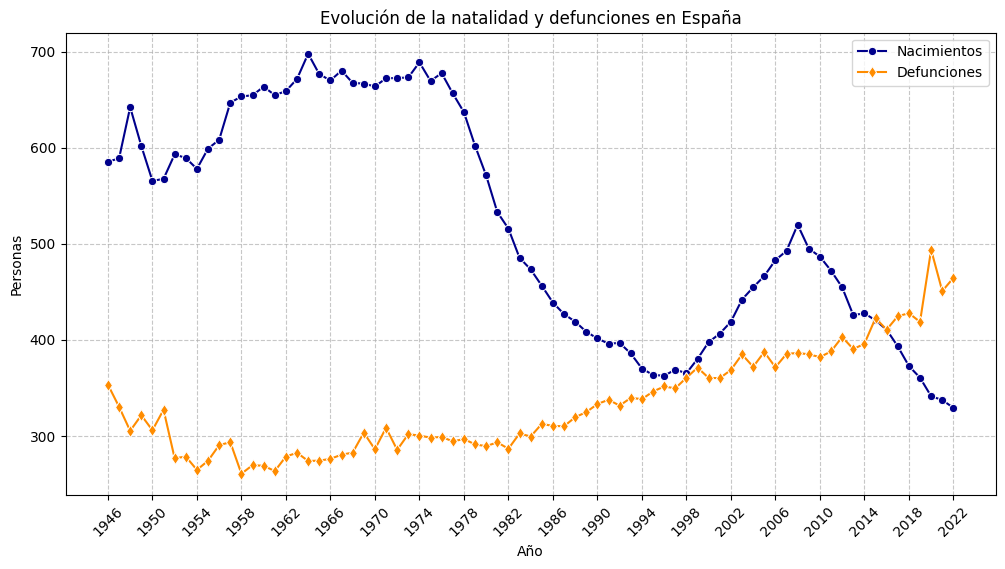

In [16]:
plt.figure(figsize=(12, 6))

# Nacimientos
sns.lineplot(x='año', y='nacimientos', data=natalidad_españa_df, label='Nacimientos', marker='o', color='darkblue')

# Defunciones
sns.lineplot(x='año', y='defunciones', data=natalidad_españa_df, label='Defunciones', marker='d', color='darkorange')

# Grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Evolución de la natalidad y defunciones en España')
plt.xlabel('Año')
plt.ylabel('Personas')

plt.ticklabel_format(style='plain', axis='y')

# Ajuste de valores en el eje X
plt.xticks(range(1946, 2023, 4))
plt.xticks(rotation=45)

plt.savefig("generated/img/nacimientos_defunciones_esp.png")

plt.show()

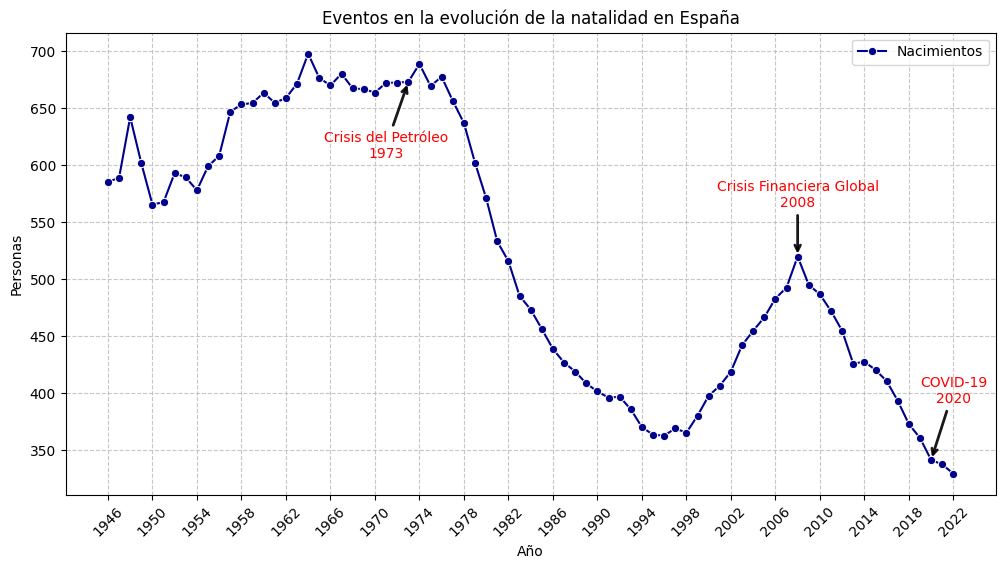

In [17]:
plt.figure(figsize=(12, 6))

# Nacimientos
sns.lineplot(x='año', y='nacimientos', data=natalidad_españa_df, label='Nacimientos', marker='o', color='darkblue', legend=True)

# Texto con flecha para las líneas verticales
petroleo_73 = 1973
ue_86 = 1986
crisis_global_08 = 2008
covid_20 = 2020

plt.annotate('Crisis del Petróleo\n1973', xy=(petroleo_73, natalidad_españa_df[natalidad_españa_df['año'] == petroleo_73]['nacimientos'].values[0]),
             xytext=(petroleo_73-2, plt.ylim()[1]*0.88),
             arrowprops=dict(facecolor='red', arrowstyle='->', alpha=0.9, linewidth=2), color='red', ha='center', va='top')

plt.annotate('Crisis Financiera Global\n2008', xy=(crisis_global_08, natalidad_españa_df[natalidad_españa_df['año'] == crisis_global_08]['nacimientos'].values[0]),
             xytext=(crisis_global_08, plt.ylim()[1]*0.82),
             arrowprops=dict(facecolor='red', arrowstyle='->', alpha=0.9, linewidth=2), color='red', ha='center', va='top')

plt.annotate('COVID-19\n2020', xy=(covid_20, natalidad_españa_df[natalidad_españa_df['año'] == covid_20]['nacimientos'].values[0]),
             xytext=(covid_20+2, plt.ylim()[1]*0.58),
             arrowprops=dict(facecolor='red', arrowstyle='->', alpha=0.9, linewidth=2), color='red', ha='center', va='top')

# Grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Eventos en la evolución de la natalidad en España')
plt.xlabel('Año')
plt.ylabel('Personas')

plt.ticklabel_format(style='plain', axis='y')

# Ajuste de valores en el eje X
plt.xticks(range(1946, 2023, 4))
plt.xticks(rotation=45)

plt.savefig("generated/img/nacimientos_esp_eventos.png")

plt.show()

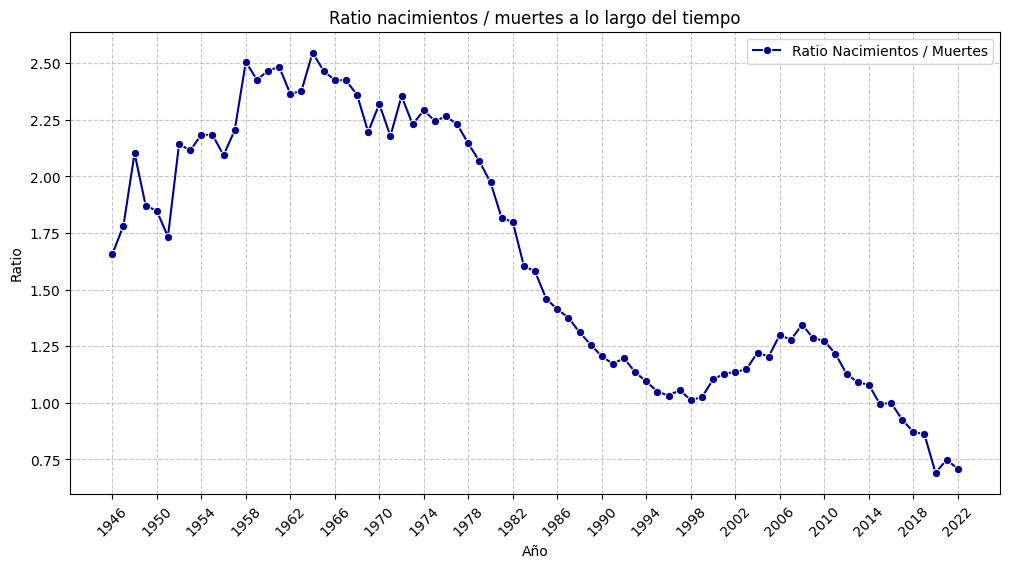

In [18]:
plt.figure(figsize=(12, 6))

# Nacimientos
sns.lineplot(x='año', y='ratio_natalidad_mortalidad', data=natalidad_españa_df, label='Ratio Nacimientos / Muertes', marker='o', color='darkblue')

# Grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.title('Ratio nacimientos / muertes a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ratio')

plt.ticklabel_format(style='plain', axis='y')

# Ajuste de valores en el eje X
plt.xticks(range(1946, 2023, 4))
plt.xticks(rotation=45)

plt.savefig("generated/img/ratio_nacimientos_defunciones.png")

plt.show()

### Subset sin España y sin Ceuta y Melilla (ya que no se ven en el mapa)

In [19]:
natalidad_mapa_df = natalidad_df[~natalidad_df['provincia'].isin(['Melilla', 'Ceuta', 'España'])]
natalidad_comunidad_grouped = natalidad_mapa_df.groupby(['codigo comunidad', 'año']).agg({'nacimientos': 'mean', 'defunciones': 'mean'}).reset_index()

In [20]:
natalidad_mapa_df.to_csv('out/natalidad_mapa.csv', index=False)

In [21]:
# Cargar el GeoDataFrame con las geometrías de las provincias de España
gdf_provincias = gpd.read_file(
    "https://raw.githubusercontent.com/manuMatnez/click_that_hood/main/public/data/spain-provinces.geojson",
    crs="epsg:4326",
)

gdf_comunidades = gpd.read_file(
    "https://raw.githubusercontent.com/manuMatnez/click_that_hood/main/public/data/spain-communities.geojson",
    crs="epsg:4326",
)

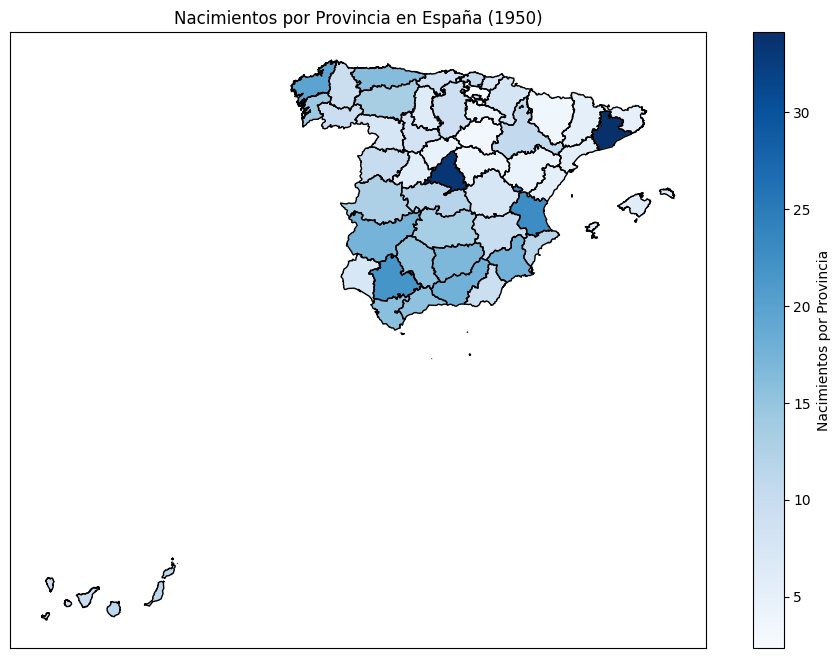

In [22]:
year = 1950
gdf_nacimientos_merged = gdf_provincias.merge(natalidad_mapa_df[natalidad_mapa_df['año'] == year], left_on='cod_prov', right_on='codigo provincia', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_nacimientos_merged.boundary.plot(ax=ax, linewidth=1, color='black')
gdf_nacimientos_merged.plot(ax=ax, column='nacimientos', legend=True, legend_kwds={'label': "Nacimientos por Provincia"}, cmap='Blues', linewidth=0.8, edgecolor='0.8')

# Desactivar los números de los ejes
ax.tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

plt.title('Nacimientos por Provincia en España ({})'.format(year))

plt.show()

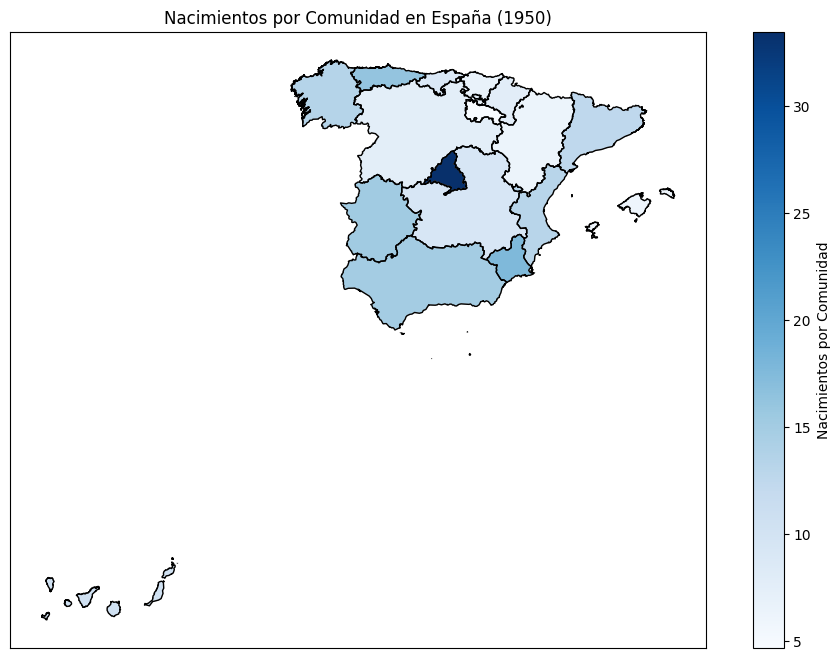

In [23]:
year = 1950
gdf_nacimientos_merged = gdf_comunidades.merge(natalidad_comunidad_grouped[natalidad_comunidad_grouped['año'] == year], left_on='cod_ccaa', right_on='codigo comunidad', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_nacimientos_merged.boundary.plot(ax=ax, linewidth=1, color='black')  # Límites de las provincias
gdf_nacimientos_merged.plot(ax=ax, column='nacimientos', legend=True, legend_kwds={'label': "Nacimientos por Comunidad"}, cmap='Blues', linewidth=0.8, edgecolor='0.8')

ax.tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

plt.title('Nacimientos por Comunidad en España ({})'.format(year))

plt.show()

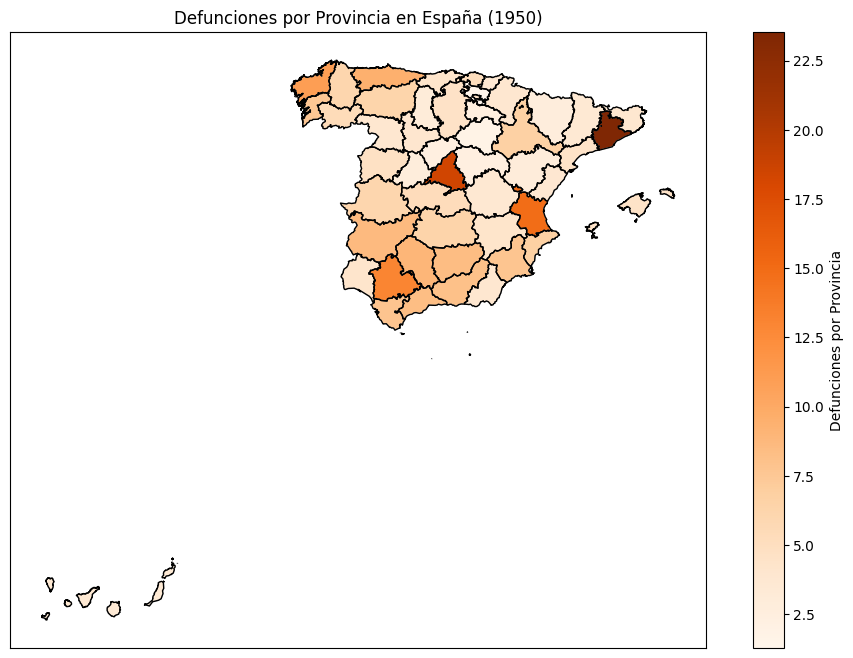

In [24]:
year = 1950
gdf_defunciones_merged = gdf_provincias.merge(natalidad_mapa_df[natalidad_mapa_df['año'] == year], left_on='cod_prov', right_on='codigo provincia', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_defunciones_merged.boundary.plot(ax=ax, linewidth=1, color='black')  # Límites de las provincias
gdf_defunciones_merged.plot(ax=ax, column='defunciones', legend=True, legend_kwds={'label': "Defunciones por Provincia"}, cmap='Oranges', linewidth=0.8, edgecolor='0.8')

ax.tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

plt.title('Defunciones por Provincia en España ({})'.format(year))

plt.show()

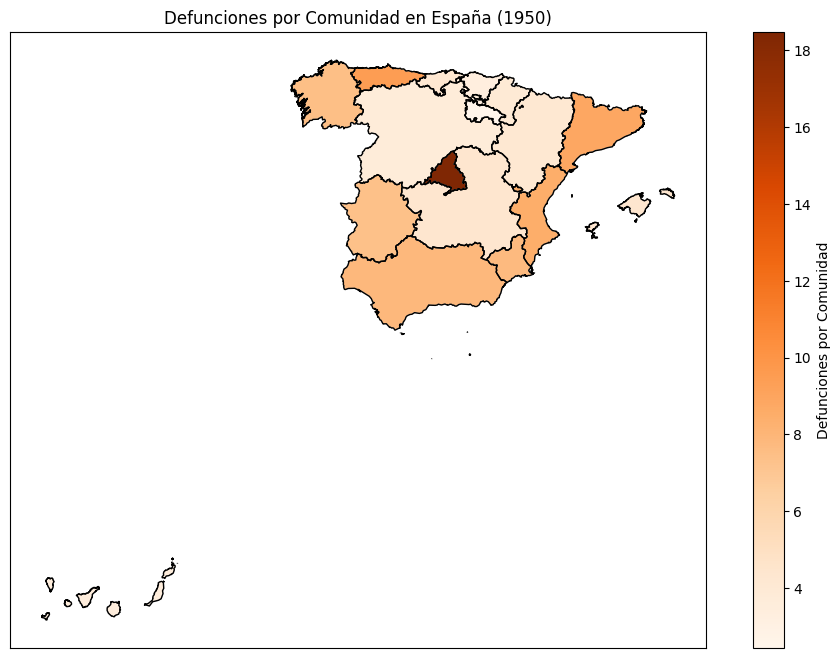

In [25]:
year = 1950
gdf_defunciones_merged = gdf_comunidades.merge(natalidad_comunidad_grouped[natalidad_comunidad_grouped['año'] == year], left_on='cod_ccaa', right_on='codigo comunidad', how='left')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf_defunciones_merged.boundary.plot(ax=ax, linewidth=1, color='black')  # Límites de las provincias
gdf_defunciones_merged.plot(ax=ax, column='defunciones', legend=True, legend_kwds={'label': "Defunciones por Comunidad"}, cmap='Oranges', linewidth=0.8, edgecolor='0.8')

ax.tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

plt.title('Defunciones por Comunidad en España ({})'.format(year))

plt.show()

## Gráficos Combinados

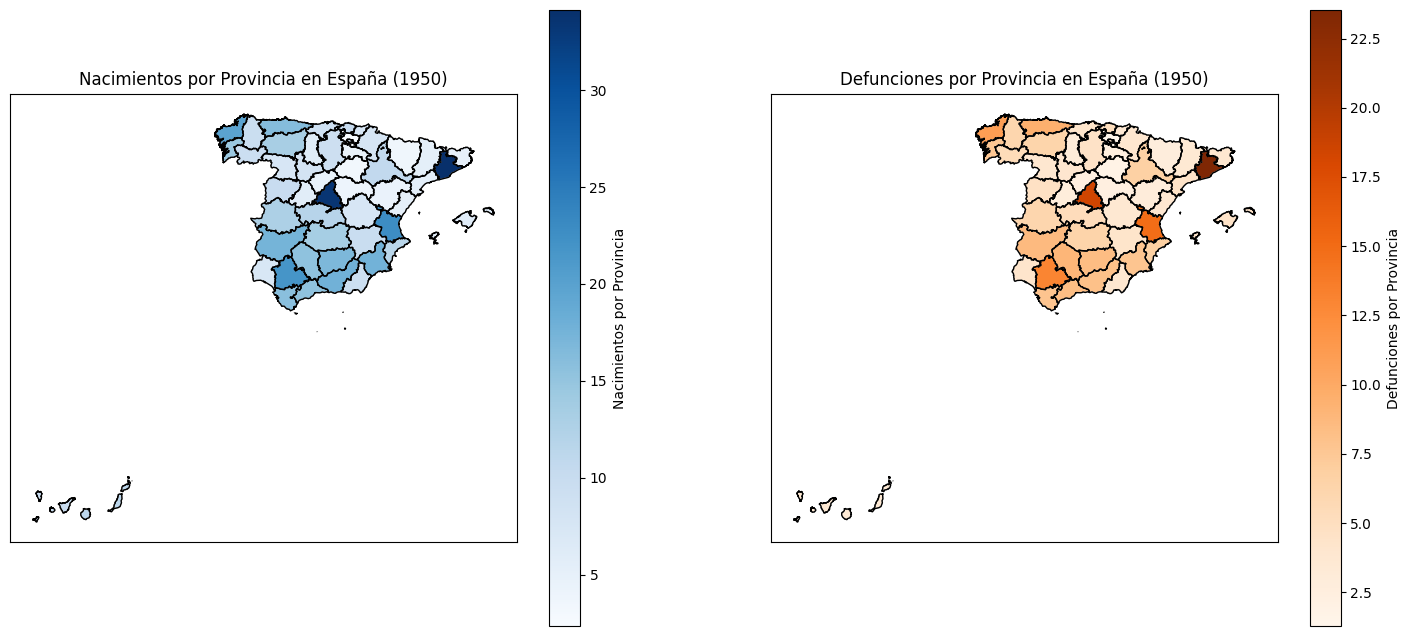

In [26]:
year = 1950
gdf_merged = gdf_provincias.merge(natalidad_mapa_df[natalidad_mapa_df['año'] == year], left_on='cod_prov', right_on='codigo provincia', how='left')

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Nacimientos
gdf_merged.boundary.plot(ax=ax[0], linewidth=1, color='black')  # Límites de las provincias
gdf_merged.plot(ax=ax[0], column='nacimientos', legend=True, legend_kwds={'label': "Nacimientos por Provincia"}, cmap='Blues', linewidth=0.8, edgecolor='0.8')
ax[0].set_title('Nacimientos por Provincia en España ({})'.format(year))
ax[0].tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

# Defunciones
gdf_merged.boundary.plot(ax=ax[1], linewidth=1, color='black')  # Límites de las provincias
gdf_merged.plot(ax=ax[1], column='defunciones', legend=True, legend_kwds={'label': "Defunciones por Provincia"}, cmap='Oranges', linewidth=0.8, edgecolor='0.8')
ax[1].set_title('Defunciones por Provincia en España ({})'.format(year))
ax[1].tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

plt.show()

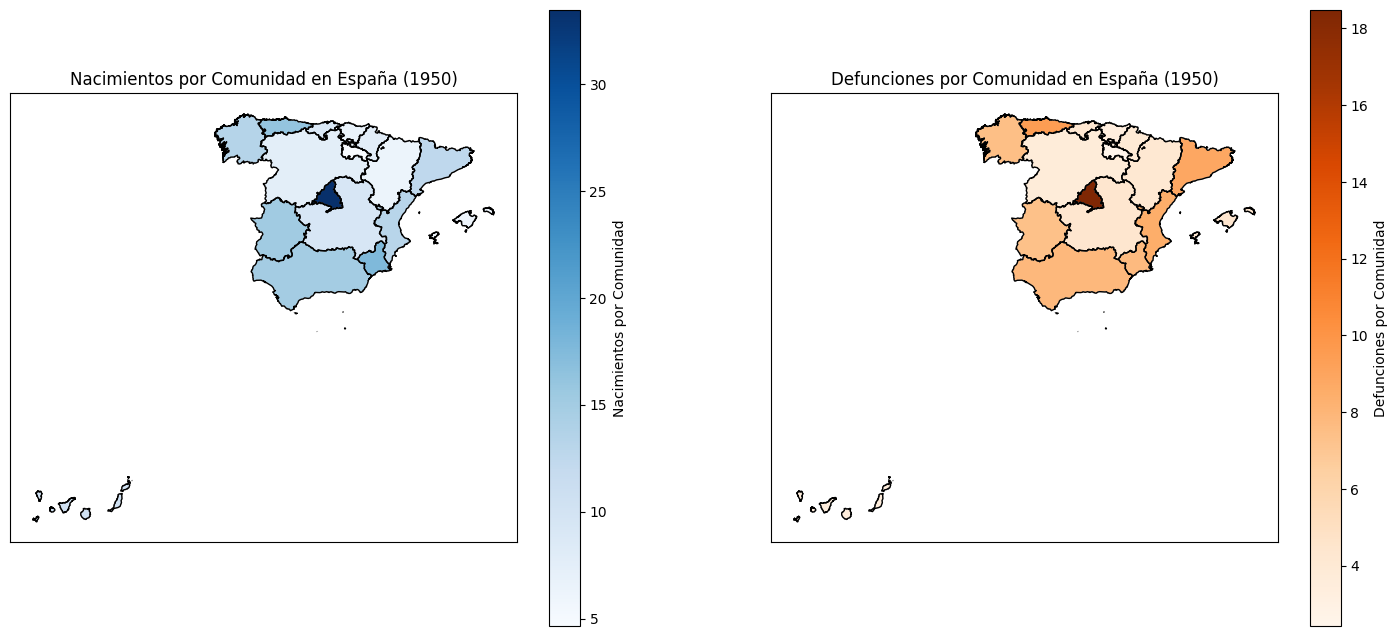

In [27]:
year = 1950
gdf_merged = gdf_comunidades.merge(natalidad_comunidad_grouped[natalidad_comunidad_grouped['año'] == year], left_on='cod_ccaa', right_on='codigo comunidad', how='left')

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Nacimientos
gdf_merged.boundary.plot(ax=ax[0], linewidth=1, color='black')  # Límites de las provincias
gdf_merged.plot(ax=ax[0], column='nacimientos', legend=True, legend_kwds={'label': "Nacimientos por Comunidad"}, cmap='Blues', linewidth=0.8, edgecolor='0.8')
ax[0].set_title('Nacimientos por Comunidad en España ({})'.format(year))
ax[0].tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

# Defunciones
gdf_merged.boundary.plot(ax=ax[1], linewidth=1, color='black')  # Límites de las provincias
gdf_merged.plot(ax=ax[1], column='defunciones', legend=True, legend_kwds={'label': "Defunciones por Comunidad"}, cmap='Oranges', linewidth=0.8, edgecolor='0.8')
ax[1].set_title('Defunciones por Comunidad en España ({})'.format(year))
ax[1].tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

plt.show()

## Guardado en PNG

In [28]:
years = set(natalidad_df['año'])
min_year = min(years)
max_year = max(years)+1

In [29]:
for year in range(min_year, max_year):                 
    gdf_merged = gdf_provincias.merge(natalidad_mapa_df[natalidad_mapa_df['año'] == year], left_on='cod_prov', right_on='codigo provincia', how='left')

    fig, ax = plt.subplots(1, 2, figsize=(18, 8))

    # Nacimientos
    gdf_merged.boundary.plot(ax=ax[0], linewidth=1, color='black')  # Límites de las provincias
    gdf_merged.plot(ax=ax[0], column='nacimientos', legend=True, legend_kwds={'label': "Nacimientos por Provincia"}, cmap='Blues', linewidth=0.8, edgecolor='0.8')
    ax[0].set_title('Nacimientos por Provincia en España ({})'.format(year))
    ax[0].tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

    # Defunciones
    gdf_merged.boundary.plot(ax=ax[1], linewidth=1, color='black')  # Límites de las provincias
    gdf_merged.plot(ax=ax[1], column='defunciones', legend=True, legend_kwds={'label': "Defunciones por Provincia"}, cmap='Oranges', linewidth=0.8, edgecolor='0.8')
    ax[1].set_title('Defunciones por Provincia en España ({})'.format(year))
    ax[1].tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)
    
    plt.savefig(f"generated/img/frames_provincias/nacimientos_defunciones_provincias_frame_{year}.png")
    plt.close()

In [30]:
for year in range(min_year, max_year):                 
    gdf_merged = gdf_comunidades.merge(natalidad_comunidad_grouped[natalidad_comunidad_grouped['año'] == year], left_on='cod_ccaa', right_on='codigo comunidad', how='left')

    fig, ax = plt.subplots(1, 2, figsize=(18, 8))

    # Nacimientos
    gdf_merged.boundary.plot(ax=ax[0], linewidth=1, color='black')  # Límites de las provincias
    gdf_merged.plot(ax=ax[0], column='nacimientos', legend=True, legend_kwds={'label': "Nacimientos por Comunidad"}, cmap='Blues', linewidth=0.8, edgecolor='0.8')
    ax[0].set_title('Nacimientos por Comunidad en España ({})'.format(year))
    ax[0].tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

    # Defunciones
    gdf_merged.boundary.plot(ax=ax[1], linewidth=1, color='black')  # Límites de las provincias
    gdf_merged.plot(ax=ax[1], column='defunciones', legend=True, legend_kwds={'label': "Defunciones por Comunidad"}, cmap='Oranges', linewidth=0.8, edgecolor='0.8')
    ax[1].set_title('Defunciones por Comunidad en España ({})'.format(year))
    ax[1].tick_params(left=False, right=False, top=False, bottom=False, labelleft=False, labelright=False, labeltop=False, labelbottom=False)

    plt.savefig(f"generated/img/frames_comunidades/nacimientos_defunciones_comunidades_frame_{year}.png")
    plt.close()

## Creación de videos MP4

In [31]:
directorio_imagenes = 'generated/img/frames_provincias'
nombre_video_salida = 'generated/video/natalidad_defunciones_provincias_esp.mp4'
archivos_imagen = sorted([f for f in os.listdir(directorio_imagenes) if f.endswith('.png')])
writer = imageio.get_writer(nombre_video_salida, fps=3)
for archivo_imagen in archivos_imagen:
    ruta_imagen = os.path.join(directorio_imagenes, archivo_imagen)
    imagen = imageio.imread(ruta_imagen)
    writer.append_data(imagen)
writer.close()

print(f'Se ha creado el video: {nombre_video_salida}')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1800, 800) to (1808, 800) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x7fbce000fc00] Stream #0: not enough frames to estimate rate; consider increasing probesize


Se ha creado el video: generated/video/natalidad_defunciones_provincias_esp.mp4


In [32]:
directorio_imagenes = 'generated/img/frames_comunidades'
nombre_video_salida = 'generated/video/natalidad_defunciones_comunidades_esp.mp4'
archivos_imagen = sorted([f for f in os.listdir(directorio_imagenes) if f.endswith('.png')])
writer = imageio.get_writer(nombre_video_salida, fps=3)
for archivo_imagen in archivos_imagen:
    ruta_imagen = os.path.join(directorio_imagenes, archivo_imagen)
    imagen = imageio.imread(ruta_imagen)
    writer.append_data(imagen)
writer.close()

print(f'Se ha creado el video: {nombre_video_salida}')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1800, 800) to (1808, 800) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[rawvideo @ 0x7fe96f809400] Stream #0: not enough frames to estimate rate; consider increasing probesize


Se ha creado el video: generated/video/natalidad_defunciones_comunidades_esp.mp4


## Creación de GIF

In [33]:
videoProvincias = VideoFileClip("generated/video/natalidad_defunciones_provincias_esp.mp4")
videoProvincias.write_gif("generated/img/natalidad_defunciones_provincias_esp.gif")

videoComunidades = VideoFileClip("generated/video/natalidad_defunciones_comunidades_esp.mp4")
videoComunidades.write_gif("generated/img/natalidad_defunciones_comunidades_esp.gif")

MoviePy - Building file generated/img/natalidad_defunciones_provincias_esp.gif with imageio.


MoviePy - Building file generated/img/natalidad_defunciones_comunidades_esp.gif with imageio.
